In [3]:
'''
La idea es predecir si un billete de banco es auténtico o no en función de cuatro atributos de la nota,
es decir, la asimetría de la imagen transformada en ondícula, la varianza de la imagen, la entropía de la imagen y la curtosis de la imagen. 
'''

'\nLa idea es predecir si un billete de banco es auténtico o no en función de cuatro atributos de la nota,\nes decir, la asimetría de la imagen transformada en ondícula, la varianza de la imagen, la entropía de la imagen y la curtosis de la imagen. \n'

In [4]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix  

In [5]:
datos = pd.read_csv("bill_authentication.csv", encoding="utf-8", delimiter=",")

In [6]:
X = datos.drop(['Class'], axis=1)  
y = datos['Class']  

In [7]:
xs = X.values
ys = y.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [9]:
svclassifier_poly = SVC(kernel='poly', degree=5, gamma='scale')  # Kernel polinómico
svclassifier_poly.fit(X_train, y_train) 
y_pred = svclassifier_poly.predict(X_test)

In [10]:
svclassifier_rbf = SVC(kernel='rbf', gamma='scale') # Kernel Gaussiano
svclassifier_rbf.fit(X_train, y_train) 
y_pred = svclassifier_rbf.predict(X_test)

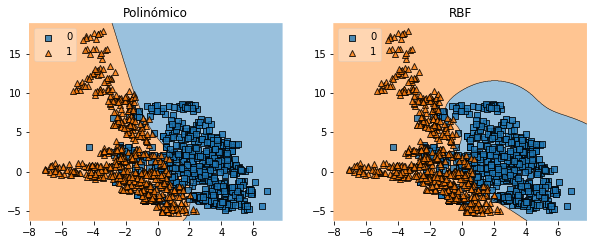

In [11]:
xs = xs[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([svclassifier_poly, svclassifier_rbf],
                         ['Polinómico', 'RBF'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(xs, ys)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=xs, y=ys, clf=clf, legend=2)
    plt.title(lab)
plt.show()

In [12]:
#Métricas

In [13]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[153   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [11]:
'''
***************************************************************************************
'''

'\n***************************************************************************************\n'

In [12]:
#punto 1.5.3

In [13]:
vinos = pd.read_csv("winequality-red.csv", encoding="utf-8", delimiter=";")

In [14]:
vinos[vinos.quality==6].describe().iloc[[1]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,6.0
